###### 7_lstm_practice.ipynb

## RNN (Recurrent Neural Network)
- 시퀀스(순서 있는 데이터)를 처리하는 신경망
- 이전 시점의 hidden state를 현재 입력과 함께 사용하여 '시간 흐름'의 패턴을 학습
- 아래와 같은 시간에 따른 변화가 있는 데이터에 적합:
  - 텍스트 (문장)
  - 타임시리즈 (주가, 센서 데이터)
  - 음성, 음악
- 단, 시퀀스 길이가 길어지면(시간이 길어지면) 과거 정보가 희미해지는 '장기 의존성 문제'가 발생

## LSTM (Long Short-Term Memory)
- RNN의 단점을 보완하기 위해 고안된 구조로, '게이트(gate)'라는 메커니즘을 사용하여 중요한 정보를 오래 기억할 수 있음
- 장기 의존성 문제를 해결하는 데 강하고, 자연어 처리(NLP)와 시계열 분야에서 매우 자주 사용됨

(47, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
 RNN 예측 결과 :: 52.46204376220703
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
 LSTM 예측 결과 : 51.096824645996094


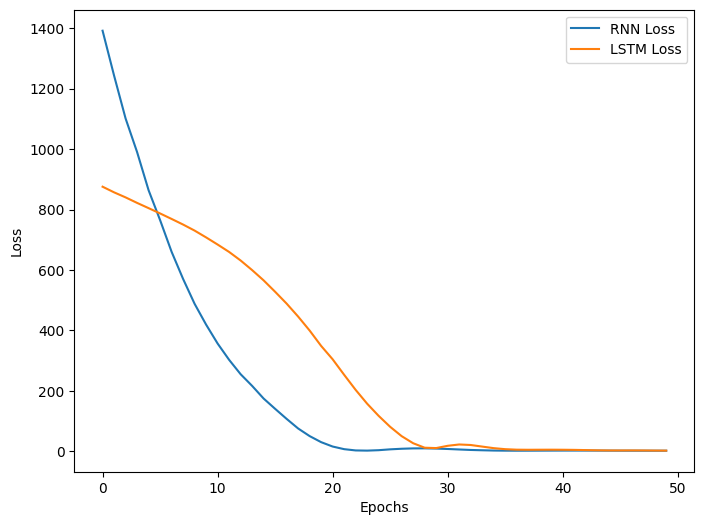

In [25]:
import numpy as np
# * 데이터 준비

# x = [[1,2,3], [2,3,4], [3,4,5], ..., [47,48,49]]
# y = [4, 5, 6, ..., 50]
data = np.arange(1, 51)     # 1 ~ 50

x, y = [], []
window = 3

for i in range( len(data) - window ):   # range(50-3) => range(47)
  x.append( data[i:i+window] )    # i=0) data[0:3] -> [1,2,3]
  y.append( data[i+window] )      # i=0) data[3] -> 4

# print(x, y)
# list -> ndarray
x = np.array(x)
y = np.array(y)

# print(type(x), type(y))
print(x.shape)

# * RNN / LSTM => (batch, timesteps, features)
x = x.reshape(x.shape[0], x.shape[1], 1)
# => 한 시점에 값이 1개인 1차원 데이터

# * 모델 정의
#   - RNN
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, LSTM

model_rnn = Sequential([
  SimpleRNN(32, activation='relu', input_shape=(x.shape[1], 1)),    # RNN층
  Dense(1)      # 출력층
])

# * 컴파일
model_rnn.compile(optimizer='adam', loss='mse')

# * 학습
history_rnn = model_rnn.fit(x, y, epochs=50, verbose=0)

# * 예측
test_data = np.array([[48, 49, 50]]).reshape(1, 3, 1)
pred_rnn = model_rnn.predict(test_data)
print(f' RNN 예측 결과 :: {pred_rnn[0][0]}')

#   - LSTM 
model_lstm = Sequential([
  LSTM(32, activation='relu', input_shape=(x.shape[1], 1)),
  Dense(1)
])

# TODO: RNN과 동일하게 설정하여 확인
# * 컴파일
model_lstm.compile(optimizer='adam', loss='mse')
# * 학습
history_lstm = model_lstm.fit(x, y, epochs=50, verbose=0)
# * 예측
pred_lstm = model_lstm.predict(test_data)[0][0]

print(f' LSTM 예측 결과 : {pred_lstm}')

# * 손실 정보 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.plot(history_rnn.history['loss'], label='RNN Loss')
plt.plot(history_lstm.history['loss'], label='LSTM Loss')

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()

# => 현재 데이터셋과 같이 단순한 경우 RNN과 LSTM의 차이가 잘 드러나지 않음
#    데이터가 짧고 규칙성이 명확할 때는, 구조가 간단한 RNN이 오히려 더 좋은 예측 할 수 있음
#    LSTM은 긴 시퀀스나 복잡한 패턴을 가진 데이터에서 더 강점을 보임